In [520]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Downlorad data from website into data folder.

In [521]:
isExist = os.path.exists('Data')
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs('Data')

In [522]:
df = pd.read_csv('Data/stroke.csv')

In [523]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Remove the 'id' column.

In [524]:
df.drop('id', axis = 1, inplace = True)

In [525]:
df.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [526]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


'bmi' is the only column with misssing values, we will try to impute the bmi values in our data pre-processing.

([<matplotlib.patches.Wedge at 0x174abebd0>,
 [Text(-1.0871361453364168, 0.16773491438301513, '0'),
  Text(1.087136143373357, -0.16773492710614463, '1')],
 [Text(-0.5929833520016818, 0.0914917714816446, '95.13%'),
  Text(0.592983350930922, -0.09149177842153342, '4.87%')])

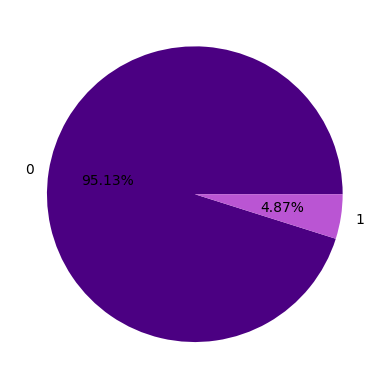

In [527]:
colors = [ 'indigo','mediumorchid']
labels = df['stroke'].value_counts().keys().map(str)
values = df['stroke'].value_counts()
plt.pie(values,colors=colors,labels=labels,autopct='%1.2f%%')

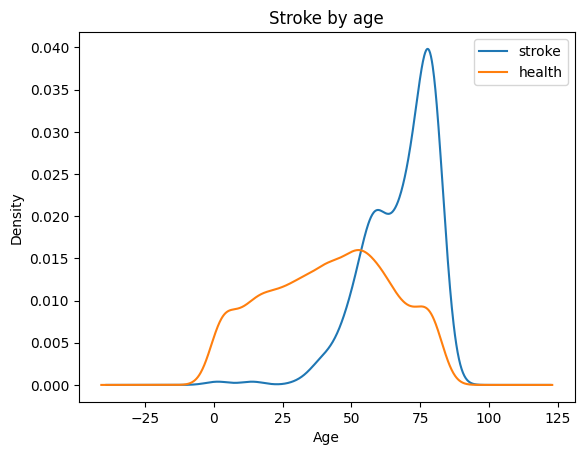

In [528]:
stroke = df.loc[df['stroke']==1]['age'].plot.kde()
health = df.loc[df['stroke']==0]['age'].plot.kde()
plt.xlabel('Age')
plt.legend(['stroke','health'])
plt.title('Stroke by age')
plt.show()

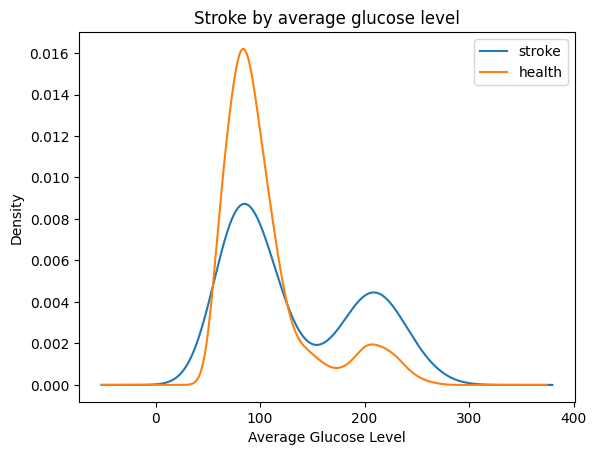

In [529]:
stroke = df.loc[df['stroke']==1]['avg_glucose_level'].plot.kde()
health = df.loc[df['stroke']==0]['avg_glucose_level'].plot.kde()
plt.xlabel('Average Glucose Level')
plt.legend(['stroke','health'])
plt.title('Stroke by average glucose level')
plt.show()

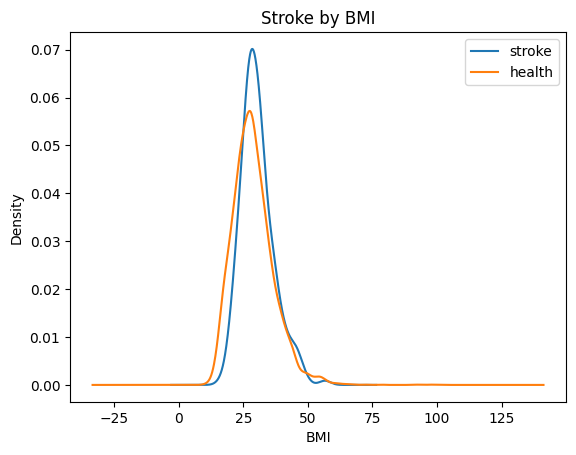

In [530]:
stroke = df.loc[df['stroke']==1]['bmi'].plot.kde()
health = df.loc[df['stroke']==0]['bmi'].plot.kde()
plt.xlabel('BMI')
plt.legend(['stroke','health'])
plt.title('Stroke by BMI')
plt.show()

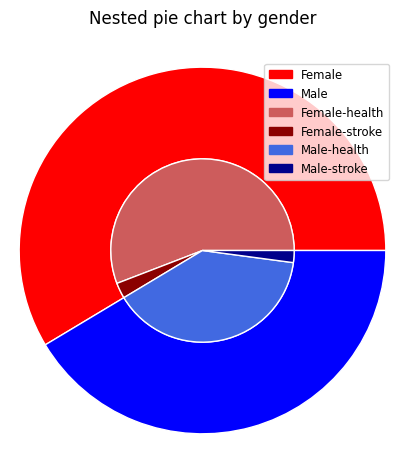

In [531]:
f0 = df.loc[df['gender']=='Female']['stroke'].value_counts()[0]
f1 = df.loc[df['gender']=='Female']['stroke'].value_counts()[1]
m0 = df.loc[df['gender']=='Male']['stroke'].value_counts()[0]
m1 = df.loc[df['gender']=='Male']['stroke'].value_counts()[1]

size = 2 

data = np.array([[f0, f1],
                 [m0, m1]])

# normalizing data to 2 pi
norm = data / np.sum(data)*2 * np.pi

# obtaining ordinates of bar edges
left = np.cumsum(np.append(0, norm.flatten()[:-1])).reshape(data.shape)

outtercol = ['red','blue']
innercol = ['indianred','darkred','royalblue','darkblue']

# Creating plot
fig, ax = plt.subplots(figsize =(7, 5),
                       subplot_kw = dict(polar = True))
 
ax.bar(x = left[:, 0],
       width = norm.sum(axis = 1),
       bottom = 1-size,
       height = size,
       color = outtercol,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.bar(x = left.flatten(),
       width = norm.flatten(),
       bottom = 1-2 * size,
       height = size,
       color = innercol,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.set(title ="Nested pie chart by gender")
ax.set_axis_off()

red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')
ind_red_patch = mpatches.Patch(color='indianred', label='Female-health')
darkred_patch = mpatches.Patch(color='darkred', label='Female-stroke')
royalblue_patch = mpatches.Patch(color='royalblue', label='Male-health')
darkblue_patch = mpatches.Patch(color='darkblue', label='Male-stroke')

plt.legend(handles=[red_patch,blue_patch,ind_red_patch,darkred_patch,royalblue_patch,darkblue_patch],fontsize = 'small')
 
# show plot
#plt.show()

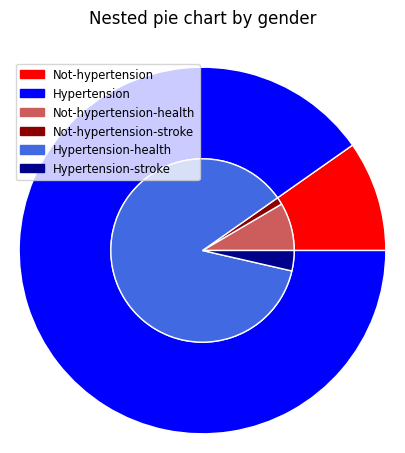

In [532]:
h10 = df.loc[df['hypertension']==1]['stroke'].value_counts()[0]
h11 = df.loc[df['hypertension']==1]['stroke'].value_counts()[1]
h00 = df.loc[df['hypertension']==0]['stroke'].value_counts()[0]
h01 = df.loc[df['hypertension']==0]['stroke'].value_counts()[1]

size = 2 

data = np.array([[h10, h11],
                 [h00, h01]])

# normalizing data to 2 pi
norm = data / np.sum(data)*2 * np.pi

# obtaining ordinates of bar edges
left = np.cumsum(np.append(0, norm.flatten()[:-1])).reshape(data.shape)

outtercol = ['red','blue']
innercol = ['indianred','darkred','royalblue','darkblue']

#fig, ax = plt.subplots(figsize =(10, 7),
                       #subplot_kw = dict(polar = True))

# Creating plot
fig, ax = plt.subplots(figsize =(7, 5),
                       subplot_kw = dict(polar = True))
 
ax.bar(x = left[:, 0],
       width = norm.sum(axis = 1),
       bottom = 1-size,
       height = size,
       color = outtercol,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.bar(x = left.flatten(),
       width = norm.flatten(),
       bottom = 1-2 * size,
       height = size,
       color = innercol,
       edgecolor ='w',
       linewidth = 1,
       align ="edge")
 
ax.set(title ="Nested pie chart by gender")
ax.set_axis_off()

red_patch = mpatches.Patch(color='red', label='Not-hypertension')
blue_patch = mpatches.Patch(color='blue', label='Hypertension')
ind_red_patch = mpatches.Patch(color='indianred', label='Not-hypertension-health')
darkred_patch = mpatches.Patch(color='darkred', label='Not-hypertension-stroke')
royalblue_patch = mpatches.Patch(color='royalblue', label='Hypertension-health')
darkblue_patch = mpatches.Patch(color='darkblue', label='Hypertension-stroke')

plt.legend(handles=[red_patch,blue_patch,ind_red_patch,darkred_patch,royalblue_patch,darkblue_patch],fontsize = 'small')
 
# show plot
#plt.show()

Nested pie chart: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

## Preprocessing

The categorical variables need to be converted into dummy variables by the function pandas.get_dummies.

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c#:~:text=To%20include%20a%20categorical%20variable,get_dummies%20function.

In [533]:
df['gender'].value_counts()
#There is only one observation with 'gender' being other, so we choose to remove the observation

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [534]:
df.drop(df[df['gender']=='Other'].index, axis = 0, inplace = True)

In [535]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [536]:
df.reset_index(inplace=True)

In [537]:
df = pd.get_dummies(df)

In [538]:
df.columns

Index(['index', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

To avoid multi-collinearity, for some of the categorical variables, we have to drop one of their dummy columns.

In [539]:
df.drop(['gender_Male','ever_married_No','work_type_children','Residence_type_Rural','smoking_status_Unknown'], axis=1, inplace=True)

In [540]:
df

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,1,1,0,0
1,1,61.0,0,0,202.21,NaN,1,1,1,0,0,0,1,0,0,1,0
2,2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
3,3,49.0,0,0,171.23,34.4,1,1,1,0,0,1,0,1,0,0,1
4,4,79.0,1,0,174.12,24.0,1,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5105,80.0,1,0,83.75,NaN,0,1,1,0,0,1,0,1,0,1,0
5105,5106,81.0,0,0,125.20,40.0,0,1,1,0,0,0,1,1,0,1,0
5106,5107,35.0,0,0,82.99,30.6,0,1,1,0,0,0,1,0,0,1,0
5107,5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0


In [541]:
df

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,1,1,0,0
1,1,61.0,0,0,202.21,NaN,1,1,1,0,0,0,1,0,0,1,0
2,2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
3,3,49.0,0,0,171.23,34.4,1,1,1,0,0,1,0,1,0,0,1
4,4,79.0,1,0,174.12,24.0,1,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5105,80.0,1,0,83.75,NaN,0,1,1,0,0,1,0,1,0,1,0
5105,5106,81.0,0,0,125.20,40.0,0,1,1,0,0,0,1,1,0,1,0
5106,5107,35.0,0,0,82.99,30.6,0,1,1,0,0,0,1,0,0,1,0
5107,5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0


## Imputation with linear regression

In [542]:
df0 = df.copy()
df1 = df.copy()
df1 = df1.loc[df1['bmi'].isna()==False]
df1.drop(['stroke','bmi'],axis=1,inplace=True)
l_model = LinearRegression()
df0 = df0.loc[df0['bmi'].isna()==False]
y_m = df0.bmi.values
#y_m = y_m.ravel()
l_model.fit(df1,y_m)
imps = []
for j in range(df.shape[0]):
        X = df.copy()
        X.drop(['bmi','stroke'], axis=1,inplace=True)
        if df['bmi'].isna()[j] == True:
            X = pd.DataFrame(X.loc[j]).transpose()
            imp = l_model.predict(X)
            df.at[j,'bmi'] = imp
            imps.append(imp)


In [543]:
df['bmi'].isna().sum()

0

In [545]:
def split_train_test(df, test_size=0.2, shuffle_state=True):
    n = df.shape[1]-1
    X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:,df.columns != df.columns[n]], 
                                                        df['stroke'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
0    3893
1     194
Name: stroke, dtype: int64
Value counts for Test sentiments
0    967
1     55
Name: stroke, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   level_0  index   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0     3262   3263  75.0             1              0              91.85  21.4   
1     3267   3268   2.0             0              0              99.75  16.0   
2     1407   1407  77.0             0              0             100.85  29.5   
3     1385   1385  45.0             0              0              89.05  27.8   
4     3600   3601  27.0             0              0              82.05  21.0   

   stroke  gender_Female  ever_married_Yes  work_type_Govt_job  \
0       0              1                 0                   0   
1       0              1                 0                   0   
2       0              1                 1                   0   
3       0       

In [546]:
X_train.to_csv('Data/X_train.csv')
X_test.to_csv('Data/X_test.csv')
Y_train.to_csv('Data/Y_train.csv')
Y_test.to_csv('Data/Y_test.csv')